In [1]:
from PIL import Image #, ImageEnhance
from tqdm import tqdm
import random
import os 
import matplotlib.pyplot as plt
import numpy as np

labels = ['C', 'G', 'GP', 'M', 'T']

num_of_files = [765, 1332, 1368, 1143, 999]

separation = [600, 100]

In [8]:
random.seed(16)

with tqdm(total=sum(num_of_files)) as pbar:
    for j in range(len(labels)):
        perm = []
        for i in range(num_of_files[j]):
            rnd = random.randint(1, num_of_files[j])
            while rnd in perm:
                rnd = random.randint(1, num_of_files[j])
            perm.append(rnd)
            image = Image.open(f'PAC/{labels[j]}/file ({perm[i]}).jpg')
            # image = image.resize((128, 72))
            if i < separation[0]:
                image.save(f'PAC_dataset/train/{labels[j]}/{labels[j]}_{i:0>4}.jpg')
            else:
                if i < separation[0] + separation[1]:
                    image.save(f'PAC_dataset/validation/{labels[j]}/{labels[j]}_{i:0>4}.jpg')
                else:
                    image.save(f'PAC_dataset/pretrain/{labels[j]}/{labels[j]}_{i:0>4}.jpg')
            pbar.update(1)

100%|████████████████████████████████████████████████████████████████████████████| 5607/5607 [00:02<00:00, 2243.71it/s]


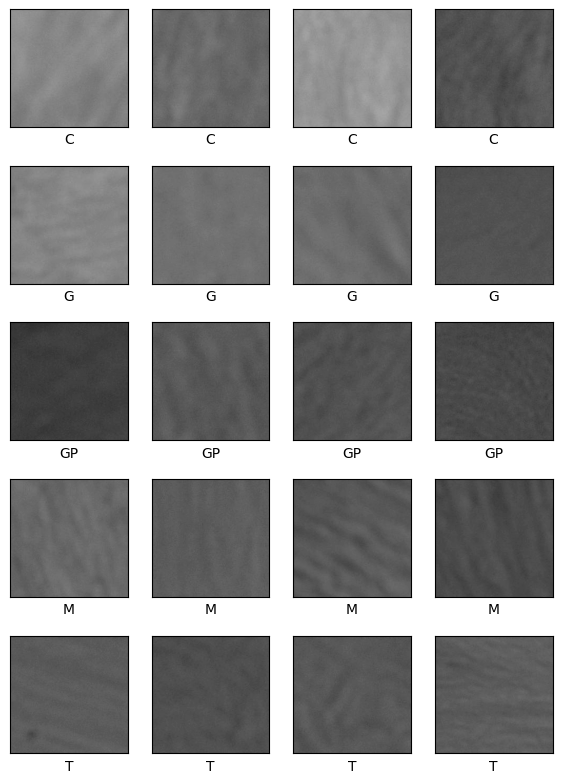

In [15]:
plt.figure(figsize=(7, 20))
number = 6

for i in range(20):
    image = Image.open(f'PAC_dataset/train/{labels[i // 4]}/{labels[i // 4]}_{number + i:0>4}.jpg')
    # image = image.convert('L')
    plt.subplot(10, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.asarray(image), cmap='gray', vmin=0, vmax=255)
    plt.xlabel(labels[i // 4])
plt.show()